#  1. IMPORTING ALL THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import roc_auc_score
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', 100)
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# ---------------------------------------------------------------------------------------------------------------

# 2. LOADING THE TRAIN DATA FILE AND A BASIC DESCRIPTION ABOUT IT

In [2]:
#reading the train and test data csv file
train = pd.read_csv('TrainData.csv')
test = pd.read_csv('TestData.csv')

In [3]:
#printing the train dataset and renaming the columns 
train.rename(columns = {'CAX_ID':'CompanyID','Dependent':'Success_or_Failure'}, inplace = True)
train['CompanyID'] = train['CompanyID'].str.replace('Company','')
test.rename(columns = {'CAX_ID':'CompanyID','Dependent':'Success_or_Failure'}, inplace = True)
test['CompanyID'] = test['CompanyID'].str.replace('Company','')
test.drop('Success_or_Failure',axis=1,inplace=True) 

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CompanyID                                 234 non-null    object 
 1   Success_or_Failure                        234 non-null    int64  
 2   Company_Location                          234 non-null    object 
 3   Company_raising_fund                      234 non-null    object 
 4   Company_Industry_count                    234 non-null    object 
 5   Company_mobile_app                        234 non-null    object 
 6   Company_investor_count_seed               234 non-null    int64  
 7   Company_investor_count_Angel_VC           234 non-null    int64  
 8   Company_cofounders_count                  234 non-null    int64  
 9   Company_advisors_count                    234 non-null    int64  
 10  Company_senior_team_count             

In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 50 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   CompanyID                                 80 non-null     object 
 1   Company_Location                          80 non-null     object 
 2   Company_raising_fund                      80 non-null     object 
 3   Company_Industry_count                    80 non-null     object 
 4   Company_mobile_app                        80 non-null     object 
 5   Company_investor_count_seed               80 non-null     int64  
 6   Company_investor_count_Angel_VC           80 non-null     int64  
 7   Company_cofounders_count                  80 non-null     int64  
 8   Company_advisors_count                    80 non-null     int64  
 9   Company_senior_team_count                 80 non-null     int64  
 10  Company_top_Angel_VC_funding            

###### only 3 dtypes are present:int,float and object

In [6]:
#checking for null values for train data
train.isnull().sum()

CompanyID                                   0
Success_or_Failure                          0
Company_Location                            0
Company_raising_fund                        0
Company_Industry_count                      0
Company_mobile_app                          0
Company_investor_count_seed                 0
Company_investor_count_Angel_VC             0
Company_cofounders_count                    0
Company_advisors_count                      0
Company_senior_team_count                   0
Company_top_Angel_VC_funding                0
Company_repeat_investors_count              0
Founders_top_company_experience             0
Founders_previous_company_employee_count    0
Founders_startup_experience                 0
Founders_big_5_experience                   0
Company_business_model                      0
Founders_experience                         0
Founders_global_exposure                    0
Founders_Industry_exposure                  0
Founder_education                 

In [7]:
#checking for null values for test data
test.isnull().sum()

CompanyID                                   0
Company_Location                            0
Company_raising_fund                        0
Company_Industry_count                      0
Company_mobile_app                          0
Company_investor_count_seed                 0
Company_investor_count_Angel_VC             0
Company_cofounders_count                    0
Company_advisors_count                      0
Company_senior_team_count                   0
Company_top_Angel_VC_funding                0
Company_repeat_investors_count              0
Founders_top_company_experience             0
Founders_previous_company_employee_count    0
Founders_startup_experience                 0
Founders_big_5_experience                   0
Company_business_model                      0
Founders_experience                         0
Founders_global_exposure                    0
Founders_Industry_exposure                  0
Founder_education                           0
Founder_university_quality        

##### No null  values present in train dataset but in test data target fetaure has 80 null values  

In [8]:
#what info does the column attribute gives us? 
column_info = pd.read_csv('DataDictionary.csv')
pd.set_option('max_colwidth', 100)
column_info

,Variables,Description,Scale
0,Dependent,"0- Company Failed, 1- Company is successful",Binary
1,Company_Location,Location of Headquarter of company,Nominal
2,Company_raising_fund,If company has been raising funds recently,Binary
3,Company_Industry_count,Number of Industry company is catering to,Continuous
4,Company_mobile_app,If company has mobile application,Binary
5,Company_investor_count_seed,Number of investor in seed funding,Continuous
6,Company_investor_count_Angel_VC,Number of investor in Angel or VC funding,Continuous
7,Company_cofounders_count,Number of cofounders,Continuous
8,Company_advisors_count,Number of company advisors,Continuous
9,Company_senior_team_count,Number of top management employees,Continuous


In [9]:
#Statistics of train dataset 
train.describe(include='all')

,CompanyID,Success_or_Failure,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
count,234,234.000000,234,234,234,234,234.000000,234.000000,234.000000,234.000000,...,234.000000,234,234,234,234.000000,234,234,234,234,234
unique,234,NaN,3,2,3,2,NaN,NaN,NaN,NaN,...,NaN,2,2,2,NaN,3,2,4,3,2
top,161,NaN,USA,No,single,No,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,Service,Yes,Management,Low,No
freq,1,NaN,179,231,116,226,NaN,NaN,NaN,NaN,...,NaN,214,221,221,NaN,110,130,106,114,176
mean,NaN,0.495726,NaN,NaN,NaN,NaN,1.448718,0.777778,2.072650,1.243590,...,11.140988,NaN,NaN,NaN,0.940171,NaN,NaN,NaN,NaN,NaN
std,NaN,0.501054,NaN,NaN,NaN,NaN,2.737347,1.663086,1.160444,2.253386,...,15.321532,NaN,NaN,NaN,1.050572,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,0.000000,...,3.070833,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.000000,...,7.383333,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,1.000000,3.000000,1.000000,...,12.000000,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


In [10]:
#Statistics of test dataset 
test.describe(include='all')

,CompanyID,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,...,Company_avg_investment_time,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_analytics_score,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
count,80,80,80,80,80,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80,80,80,80.000000,80,80,80,80,80
unique,80,3,2,3,2,NaN,NaN,NaN,NaN,NaN,...,NaN,2,2,2,NaN,3,2,4,3,2
top,66,USA,No,Few,No,NaN,NaN,NaN,NaN,NaN,...,NaN,No,No,No,NaN,Service,Yes,Management,Low,No
freq,1,62,78,37,78,NaN,NaN,NaN,NaN,NaN,...,NaN,77,76,76,NaN,43,42,29,40,60
mean,NaN,NaN,NaN,NaN,NaN,1.475000,0.225000,2.012500,1.087500,3.762500,...,11.162913,NaN,NaN,NaN,0.887500,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,2.968079,0.502525,1.096528,1.969346,2.491727,...,12.680807,NaN,NaN,NaN,1.125018,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.000000,2.000000,...,4.741667,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,2.000000,0.000000,3.000000,...,8.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,2.000000,0.000000,2.250000,1.250000,4.250000,...,12.266667,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,NaN


# ---------------------------------------------------------------------------------------------------------------

#  3. Explorary Data Analysis

### 3.1 Exploring the categorical columns

In [11]:
#creating the categorical data from the train data
categoricaldata = train.select_dtypes(include=['object'])
categoricaldata.drop('CompanyID',axis=1,inplace=True)   

In [12]:
categoricaldata

,Company_Location,Company_raising_fund,Company_Industry_count,Company_mobile_app,Company_top_Angel_VC_funding,Founders_top_company_experience,Founders_previous_company_employee_count,Founders_startup_experience,Founders_big_5_experience,Company_business_model,...,Founders_publications,Company_incubation_investor,Company_crowdsourcing,Company_crowdfunding,Company_big_data,Company_Product_or_service,Company_subscription_offering,Founder_highest_degree_type,Company_difficulty_obtaining_workforce,Company_Founder_Patent
0,USA,No,Few,Yes,No,Yes,Large,Yes,No,B2C,...,None,No,Yes,No,No,Product,No,Management,Medium,Yes
1,USA,No,Few,No,No,Yes,Medium,No,No,B2B,...,None,Yes,No,No,No,Both,Yes,Science,Medium,Yes
2,USA,No,Few,No,No,No,Small,No,No,B2B,...,Few,No,No,No,No,Product,No,Technology,Medium,Yes
3,USA,No,Few,No,No,No,Medium,No,No,Both,...,None,Yes,No,No,No,Service,No,Science,Medium,Yes
4,USA,No,Few,No,No,No,Large,Yes,No,B2B,...,Few,No,No,No,No,Both,No,Management,Medium,No
5,USA,No,Few,No,No,Yes,Medium,Yes,No,B2B,...,None,No,Yes,No,No,Product,No,Management,Medium,Yes
6,USA,No,Few,No,No,No,Small,Yes,No,B2B,...,None,No,No,No,No,Both,No,Science,Medium,Yes
7,USA,No,Few,No,No,No,Medium,Yes,No,B2B,...,Few,No,No,No,No,Product,No,Science,Medium,Yes
8,USA,No,Few,No,No,No,Large,Yes,Yes,B2B,...,None,Yes,No,No,No,Product,Yes,Science,Medium,No
9,USA,No,Few,No,No,No,Medium,No,No,B2B,...,Few,No,No,No,No,Product,No,Management,Medium,Yes


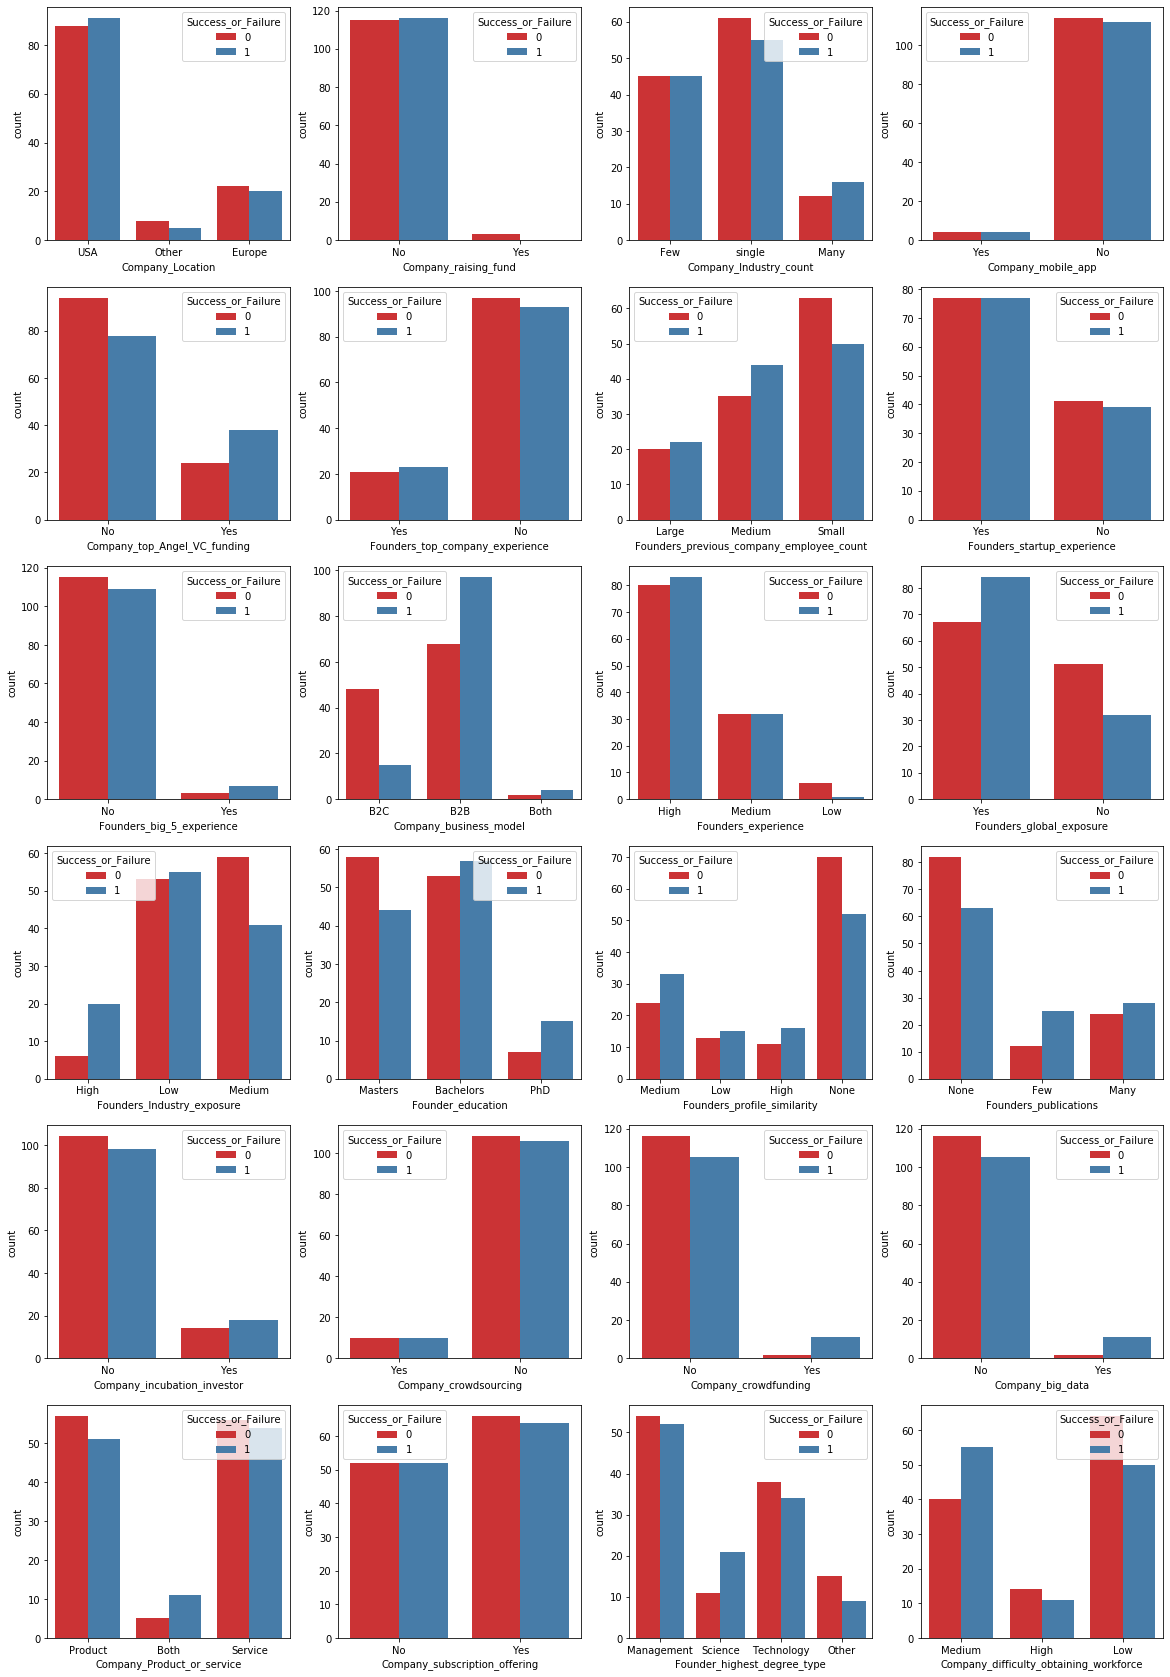

In [13]:
#Countplot for categorical fetaures with succes of failure
fig, ax = plt.subplots(6, 4, figsize=(20, 30))
for col, subplot in zip(categoricaldata, ax.flatten()):
    sns.countplot(categoricaldata[col],hue=train['Success_or_Failure'] , ax=subplot, palette="Set1")

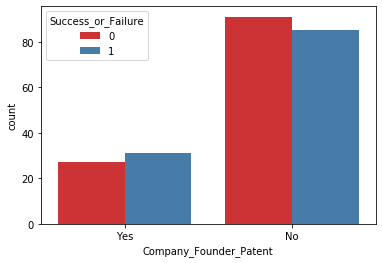

In [14]:
ax=sns.countplot(categoricaldata['Company_Founder_Patent'],hue=train['Success_or_Failure'],palette="Set1")

### After observing the plots we can see that:
######      only 3 companies have started raising funds recently: company id - 111,141,223 
######      8 companies have mobile application:   company id - 2,115,119,121,186,208,272,286 
######      Most of the companies are from USA
######     16 companies are both product and service based
######     7 companies have very low founder's experience : Company Id = 27,84,85,186,190,266,305
######     6 companies have both B2B and B2C business model


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------    

### 3.2 Exploring the numerical columns

In [15]:
#Creating the numerical data from train data
numericaldata = train.select_dtypes(include=['int64','float64'])
numericaldata.drop('Success_or_Failure',axis=1,inplace=True) 

In [16]:
numericaldata

,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,...,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_analytics_score
0,5,0,2,0,4,0,4,1,0.0,34.0,...,0.000000,8.823529,21.764706,10.882353,2.941176,0.000000,0,10,9.000000,2
1,15,0,3,0,7,0,1,1,0.2,36.0,...,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,0,2,7.344444,1
2,7,0,1,1,8,0,0,1,0.0,23.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,13,9.822222,0
3,2,0,4,0,4,2,0,1,0.0,25.0,...,9.375000,3.125000,6.250000,3.125000,3.125000,0.000000,0,12,9.322222,0
4,0,0,3,4,4,0,4,1,0.0,4.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,20,6.400000,2
5,13,0,2,0,2,0,4,1,0.0,48.0,...,8.333333,0.000000,19.771242,2.777778,2.777778,0.000000,0,18,12.000000,0
6,0,0,2,1,8,0,0,1,0.2,14.5,...,3.846154,3.846154,7.692308,0.000000,3.846154,0.000000,4,24,2.666667,0
7,0,0,0,1,8,1,0,1,0.5,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,12,6.000000,0
8,0,0,3,0,6,0,4,1,0.2,20.5,...,0.000000,12.500000,4.166667,4.166667,4.166667,0.000000,0,14,7.333333,0
9,0,2,2,0,5,0,4,1,0.0,22.5,...,0.000000,13.333333,6.666667,0.000000,0.000000,0.000000,0,48,48.000000,2


In [17]:
cols = list(numericaldata.columns)

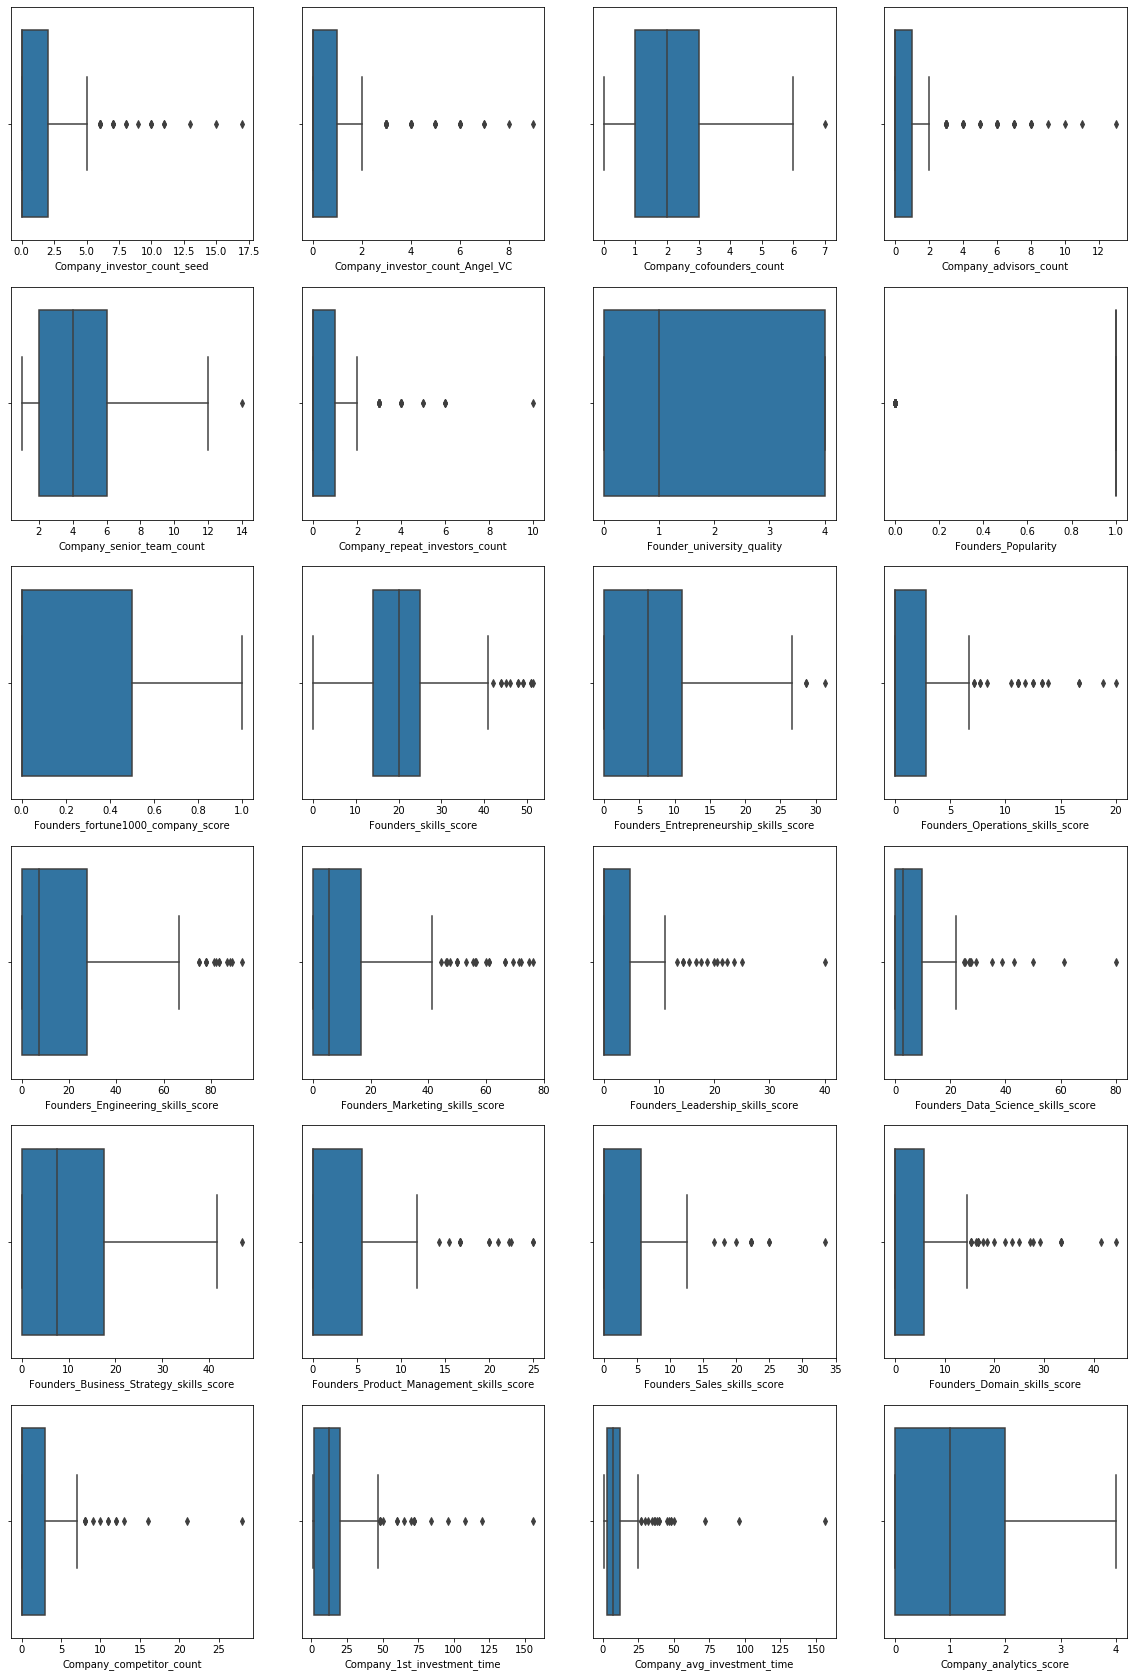

In [18]:
#Boxplot of numerical fetaures  
fig, ax = plt.subplots(6, 4, figsize=(20, 30))
for col, subplot in zip(numericaldata, ax.flatten()):
    sns.boxplot(numericaldata[col] ,ax=subplot)

######  There are outliers present in the some of the features but we will not treat outliers as we dont have domain knowledge 

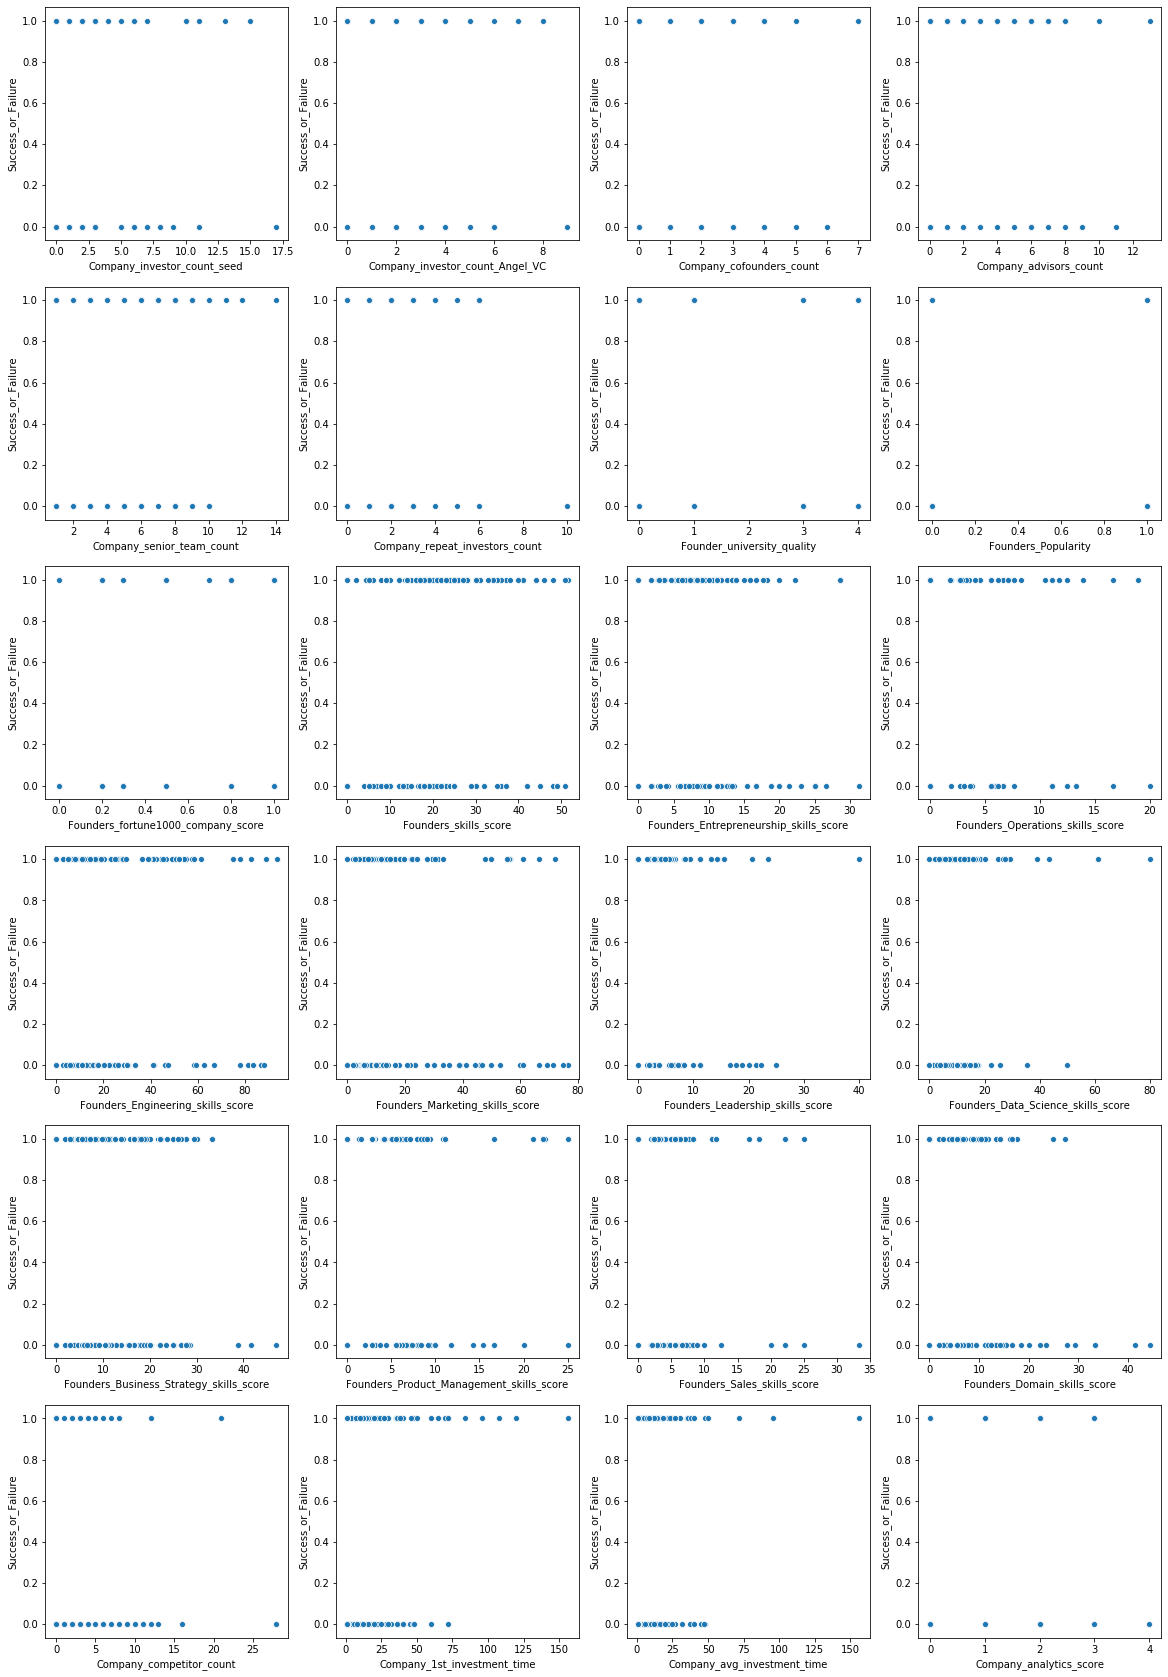

In [19]:
#Scatter plot for numerical features
fig, ax = plt.subplots(6, 4, figsize=(20, 30))
for col, subplot in zip(numericaldata, ax.flatten()):
    sns.scatterplot(numericaldata[col],train['Success_or_Failure'],ax=subplot)

In [20]:
#Average values of Startup Succeeded
train[train['Success_or_Failure'] == 1].mean()

CompanyID                                   2.031803e+296
Success_or_Failure                           1.000000e+00
Company_investor_count_seed                  1.318966e+00
Company_investor_count_Angel_VC              7.500000e-01
Company_cofounders_count                     2.198276e+00
Company_advisors_count                       1.543103e+00
Company_senior_team_count                    5.137931e+00
Company_repeat_investors_count               9.741379e-01
Founder_university_quality                   2.051724e+00
Founders_Popularity                          8.620690e-01
Founders_fortune1000_company_score           3.137931e-01
Founders_skills_score                        2.213793e+01
Founders_Entrepreneurship_skills_score       6.592563e+00
Founders_Operations_skills_score             1.874289e+00
Founders_Engineering_skills_score            2.049734e+01
Founders_Marketing_skills_score              1.180173e+01
Founders_Leadership_skills_score             2.780210e+00
Founders_Data_

In [21]:
#Average values of startup faield
train[train['Success_or_Failure'] == 0].mean()

CompanyID                                         inf
Success_or_Failure                           0.000000
Company_investor_count_seed                  1.576271
Company_investor_count_Angel_VC              0.805085
Company_cofounders_count                     1.949153
Company_advisors_count                       0.949153
Company_senior_team_count                    3.457627
Company_repeat_investors_count               0.550847
Founder_university_quality                   1.762712
Founders_Popularity                          0.805085
Founders_fortune1000_company_score           0.232203
Founders_skills_score                       18.838983
Founders_Entrepreneurship_skills_score       7.807415
Founders_Operations_skills_score             2.113836
Founders_Engineering_skills_score           16.392103
Founders_Marketing_skills_score             12.232621
Founders_Leadership_skills_score             3.031514
Founders_Data_Science_skills_score           4.805356
Founders_Business_Strategy_s

In [22]:
#Max values of Numerical features
numericaldata.apply(np.max) 

Company_investor_count_seed                  17.000000
Company_investor_count_Angel_VC               9.000000
Company_cofounders_count                      7.000000
Company_advisors_count                       13.000000
Company_senior_team_count                    14.000000
Company_repeat_investors_count               10.000000
Founder_university_quality                    4.000000
Founders_Popularity                           1.000000
Founders_fortune1000_company_score            1.000000
Founders_skills_score                        51.500000
Founders_Entrepreneurship_skills_score       31.250000
Founders_Operations_skills_score             20.000000
Founders_Engineering_skills_score            93.333333
Founders_Marketing_skills_score              76.470588
Founders_Leadership_skills_score             40.000000
Founders_Data_Science_skills_score           80.000000
Founders_Business_Strategy_skills_score      47.058824
Founders_Product_Management_skills_score     25.000000
Founders_S

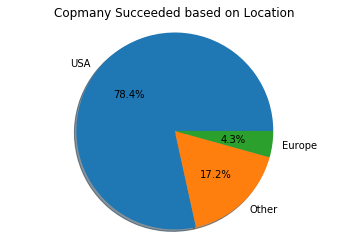

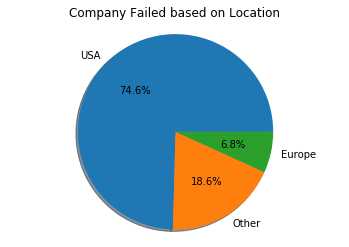

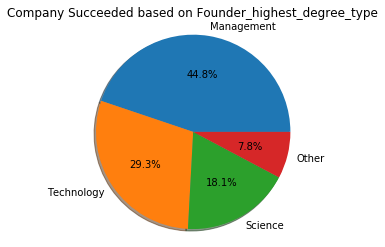

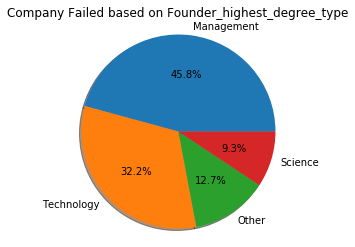

In [23]:
# Piechart plotting
df_1 = train[(train['Success_or_Failure'] == 1) & (train['Company_Location'])]
df_2 = train[(train['Success_or_Failure'] == 0) & (train['Company_Location'])]
df_3 = train[(train['Success_or_Failure'] == 1) & (train['Founder_highest_degree_type'])]
df_4 = train[(train['Success_or_Failure'] == 0) & (train['Founder_highest_degree_type'])]
################################################################################################################################
labels = ['USA','Other','Europe']
sizes = df_1['Company_Location'].value_counts()
fig1, ax1 = plt.subplots()
plt.title('Copmany Succeeded based on Location')
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()
################################################################################################################################
labels = ['USA','Other','Europe']
sizes = df_2['Company_Location'].value_counts()
fig1, ax1 = plt.subplots()
plt.title('Company Failed based on Location')
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()
################################################################################################################################
labels = ['Management','Technology','Science','Other']
sizes = df_3['Founder_highest_degree_type'].value_counts()
fig1, ax1 = plt.subplots()
plt.title('Company Succeeded based on Founder_highest_degree_type')
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()
################################################################################################################################
labels = ['Management','Technology','Other','Science']
sizes = df_4['Founder_highest_degree_type'].value_counts()
fig1, ax1 = plt.subplots()
plt.title('Company Failed based on Founder_highest_degree_type')
ax1.pie(sizes,  labels=labels, autopct='%1.1f%%',shadow=True)
ax1.axis('equal')
plt.show()

In [24]:
numericaldata[numericaldata.Company_investor_count_seed>10]

,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,...,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_analytics_score
1,15,0,3,0,7,0,1,1,0.2,36.0,...,0.000000,3.846154,17.094017,9.401709,0.000000,2.777778,0,2,7.344444,1
5,13,0,2,0,2,0,4,1,0.0,48.0,...,8.333333,0.000000,19.771242,2.777778,2.777778,0.000000,0,18,12.000000,0
111,17,0,2,5,2,10,0,1,1.0,22.0,...,0.000000,5.902778,18.055556,6.250000,0.000000,9.375000,4,12,6.000000,1
112,11,0,3,9,9,0,0,1,0.5,21.0,...,0.000000,3.333333,25.098039,6.274510,8.823529,18.431373,3,28,12.000000,1
192,11,0,1,0,1,0,3,1,1.0,34.0,...,0.000000,0.000000,11.111111,22.222222,5.555556,0.000000,0,6,3.000000,1


In [25]:
numericaldata[numericaldata.Company_cofounders_count>4]

,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,...,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_analytics_score
73,0,0,5,0,6,0,0,0,0.0,36.0,...,0.000000,2.777778,2.777778,0.000000,0.000000,0.000000,0,12,5.355556,1
146,1,0,5,0,8,0,1,1,0.0,24.0,...,0.000000,0.000000,7.692308,0.000000,7.692308,0.000000,0,1,1.000000,0
184,1,0,7,0,3,1,0,1,0.0,22.0,...,1.851852,1.851852,12.535613,0.000000,6.980057,1.851852,0,1,1.000000,1
232,6,0,6,7,6,2,4,1,0.5,0.0,...,1.960784,3.921569,5.882353,1.960784,0.000000,1.960784,0,12,12.000000,0


In [26]:
numericaldata[numericaldata.Company_senior_team_count>7]

,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,...,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_analytics_score
2,7,0,1,1,8,0,0,1,0.0,23.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,13,9.822222,0
6,0,0,2,1,8,0,0,1,0.2,14.5,...,3.846154,3.846154,7.692308,0.000000,3.846154,0.000000,4,24,2.666667,0
7,0,0,0,1,8,1,0,1,0.5,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,12,6.000000,0
10,0,0,2,0,8,0,4,1,0.3,21.0,...,11.111111,11.111111,27.777778,0.000000,11.111111,5.555556,0,38,8.000000,1
12,0,0,3,0,8,2,1,1,0.0,4.5,...,40.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0,30,12.616667,3
13,0,3,0,0,8,0,4,1,0.0,18.5,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,35,24.625000,1
21,0,0,2,8,10,2,0,1,1.0,18.0,...,5.555556,5.555556,22.222222,5.555556,22.222222,5.555556,0,36,13.622222,3
31,0,0,2,13,14,0,4,1,0.0,25.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,72,24.000000,1
32,0,0,2,0,9,0,4,1,0.0,51.5,...,13.157895,43.274854,19.152047,0.000000,5.555556,0.000000,0,156,156.000000,2
36,0,2,4,3,8,5,4,0,0.0,26.0,...,0.000000,0.000000,27.777778,5.555556,5.555556,0.000000,3,12,6.466667,3


In [27]:
numericaldata[numericaldata.Company_repeat_investors_count>3]

,Company_investor_count_seed,Company_investor_count_Angel_VC,Company_cofounders_count,Company_advisors_count,Company_senior_team_count,Company_repeat_investors_count,Founder_university_quality,Founders_Popularity,Founders_fortune1000_company_score,Founders_skills_score,...,Founders_Leadership_skills_score,Founders_Data_Science_skills_score,Founders_Business_Strategy_skills_score,Founders_Product_Management_skills_score,Founders_Sales_skills_score,Founders_Domain_skills_score,Company_competitor_count,Company_1st_investment_time,Company_avg_investment_time,Company_analytics_score
17,6,0,2,6,5,4,4,1,0.0,30.0,...,0.000000,8.823529,17.647059,2.941176,5.882353,2.941176,0,5,18.000000,0
35,0,0,3,5,7,4,0,1,0.0,44.0,...,5.718954,17.156863,17.320261,2.777778,0.000000,5.718954,0,20,4.900000,3
36,0,2,4,3,8,5,4,0,0.0,26.0,...,0.000000,0.000000,27.777778,5.555556,5.555556,0.000000,3,12,6.466667,3
88,5,5,3,0,3,5,4,0,0.3,12.0,...,0.000000,4.444444,1.960784,8.104575,0.000000,4.183007,0,3,2.711111,0
95,0,7,2,0,6,6,0,1,1.0,40.0,...,0.000000,8.333333,2.777778,0.000000,0.000000,0.000000,0,12,8.877778,0
99,0,7,4,1,4,4,3,0,1.0,10.0,...,5.555556,15.277778,5.555556,1.388889,0.000000,0.000000,0,1,6.366667,1
111,17,0,2,5,2,10,0,1,1.0,22.0,...,0.000000,5.902778,18.055556,6.250000,0.000000,9.375000,4,12,6.000000,1
120,1,0,2,1,10,6,3,1,0.5,18.0,...,0.000000,0.000000,8.333333,0.000000,0.000000,0.000000,2,5,14.000000,3
126,0,2,2,2,4,4,0,1,1.0,42.0,...,2.777778,2.941176,19.444444,2.777778,2.777778,29.248366,2,12,10.000000,2
142,0,0,4,8,8,4,1,1,0.2,16.0,...,0.000000,6.613757,0.000000,4.232804,1.851852,6.455026,0,10,9.077778,0


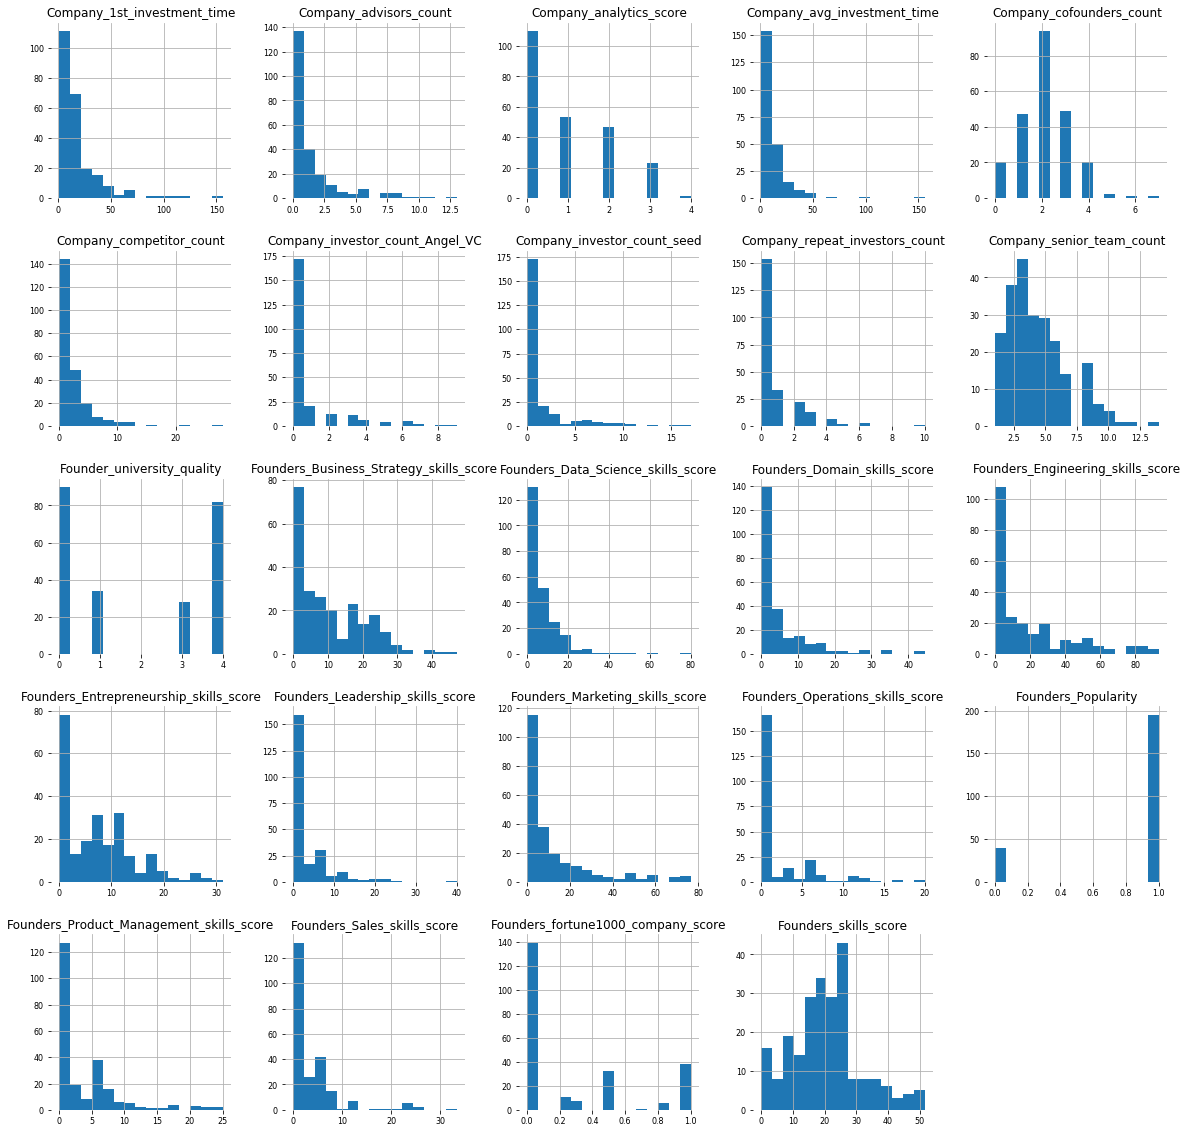

In [28]:
#Histogram of Numerical features
numericaldata.hist(figsize=(20, 20), bins=15, xlabelsize=8, ylabelsize=8)
sns.despine(bottom=True, left=True)

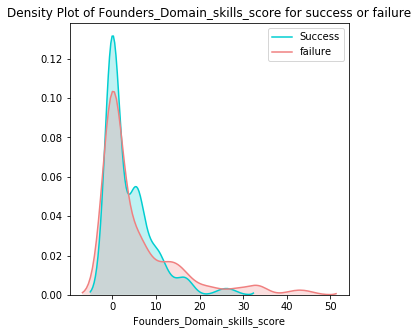

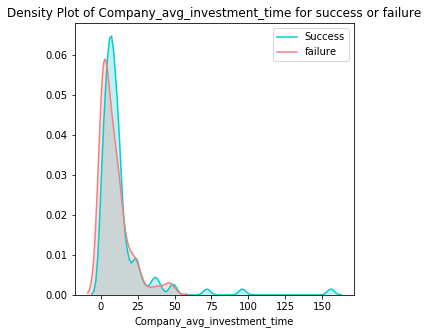

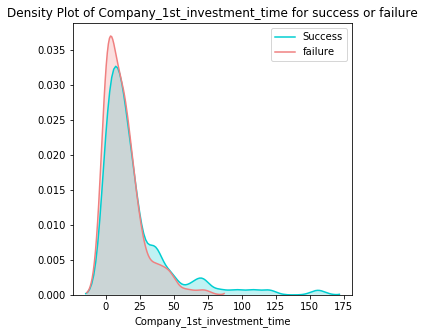

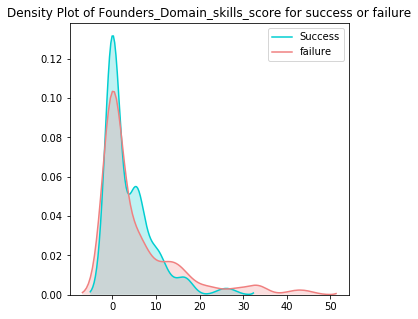

In [29]:
# Kde plots
plt.figure(figsize=(5,5))
ax = sns.kdeplot(train["Founders_Domain_skills_score"][train.Success_or_Failure == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Founders_Domain_skills_score"][train.Success_or_Failure == 0], color="lightcoral", shade=True)
plt.legend(['Success', 'failure'])
plt.title('Density Plot of Founders_Domain_skills_score for success or failure')
ax.set(xlabel='Founders_Domain_skills_score')
plt.show()
################################################################################################################################
plt.figure(figsize=(5,5))
ax = sns.kdeplot(train["Company_avg_investment_time"][train.Success_or_Failure == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Company_avg_investment_time"][train.Success_or_Failure == 0], color="lightcoral", shade=True)
plt.legend(['Success', 'failure'])
plt.title('Density Plot of Company_avg_investment_time for success or failure')
ax.set(xlabel='Company_avg_investment_time')
plt.show()
################################################################################################################################
plt.figure(figsize=(5,5))
ax = sns.kdeplot(train["Company_1st_investment_time"][train.Success_or_Failure == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Company_1st_investment_time"][train.Success_or_Failure == 0], color="lightcoral", shade=True)
plt.legend(['Success', 'failure'])
plt.title('Density Plot of Company_1st_investment_time for success or failure')
ax.set(xlabel='Company_1st_investment_time')
plt.show()
################################################################################################################################
plt.figure(figsize=(5,5))
sns.kdeplot(train["Founders_Domain_skills_score"][train.Success_or_Failure == 1], color="darkturquoise", shade=True)
sns.kdeplot(train["Founders_Domain_skills_score"][train.Success_or_Failure == 0], color="lightcoral", shade=True)
plt.legend(['Success', 'failure'])
plt.title('Density Plot of Founders_Domain_skills_score for success or failure')
ax.set(xlabel='Founders_Domain_skills_score')
plt.show()

# ---------------------------------------------------------------------------------------------------------------

#  4. Preprocessing and Modelling

### 4.1 Encoding the features

In [30]:
#Using dummy variables and label encoding for encoding
final_train = pd.get_dummies(train,columns=['Company_Location','Company_Industry_count','Founders_previous_company_employee_count','Company_business_model','Founders_experience','Founders_Industry_exposure','Founder_education', 'Founders_profile_similarity','Founders_publications','Company_Product_or_service','Founder_highest_degree_type','Company_difficulty_obtaining_workforce'])
le = preprocessing.LabelEncoder()
objList = final_train.select_dtypes(include = "object").columns
for i in objList:
    final_train[i] = le.fit_transform(final_train[i])
print(final_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 77 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   CompanyID                                        234 non-null    int32  
 1   Success_or_Failure                               234 non-null    int64  
 2   Company_raising_fund                             234 non-null    int32  
 3   Company_mobile_app                               234 non-null    int32  
 4   Company_investor_count_seed                      234 non-null    int64  
 5   Company_investor_count_Angel_VC                  234 non-null    int64  
 6   Company_cofounders_count                         234 non-null    int64  
 7   Company_advisors_count                           234 non-null    int64  
 8   Company_senior_team_count                        234 non-null    int64  
 9   Company_top_Angel_VC_funding    

In [31]:
#Using dummy variables and label encoding for encoding
final_test = pd.get_dummies(test,columns=['Company_Location','Company_Industry_count','Founders_previous_company_employee_count','Company_business_model','Founders_experience','Founders_Industry_exposure','Founder_education', 'Founders_profile_similarity','Founders_publications','Company_Product_or_service','Founder_highest_degree_type','Company_difficulty_obtaining_workforce'])
objList1 = final_test.select_dtypes(include = "object").columns
for i in objList1:
    final_test[i] = le.fit_transform(final_test[i])
print(final_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 76 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   CompanyID                                        80 non-null     int32  
 1   Company_raising_fund                             80 non-null     int32  
 2   Company_mobile_app                               80 non-null     int32  
 3   Company_investor_count_seed                      80 non-null     int64  
 4   Company_investor_count_Angel_VC                  80 non-null     int64  
 5   Company_cofounders_count                         80 non-null     int64  
 6   Company_advisors_count                           80 non-null     int64  
 7   Company_senior_team_count                        80 non-null     int64  
 8   Company_top_Angel_VC_funding                     80 non-null     int32  
 9   Company_repeat_investors_count    

### 4.2  Feature Selection using RFE

In [32]:
X = final_train.drop('Success_or_Failure',axis=1)
y = final_train.Success_or_Failure
model = LogisticRegression()
rfe = RFE(model)
rfe = rfe.fit(X, y)
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Company_raising_fund', 'Company_mobile_app', 'Company_senior_team_count', 'Company_top_Angel_VC_funding', 'Company_repeat_investors_count', 'Founders_top_company_experience', 'Founders_big_5_experience', 'Founders_global_exposure', 'Founders_Popularity', 'Founders_fortune1000_company_score', 'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data', 'Company_analytics_score', 'Company_subscription_offering', 'Company_Founder_Patent', 'Company_Location_Europe', 'Company_Location_USA', 'Founders_previous_company_employee_count_Medium', 'Company_business_model_B2B', 'Company_business_model_B2C', 'Company_business_model_Both', 'Founders_experience_High', 'Founders_experience_Low', 'Founders_Industry_exposure_High', 'Founders_Industry_exposure_Medium', 'Founder_education_Bachelors', 'Founder_education_Masters', 'Founder_education_PhD', 'Founders_publications_Few', 'Founders_publications_Many', 'Founders_publications_None', 'Company_Product_or_service_Service',

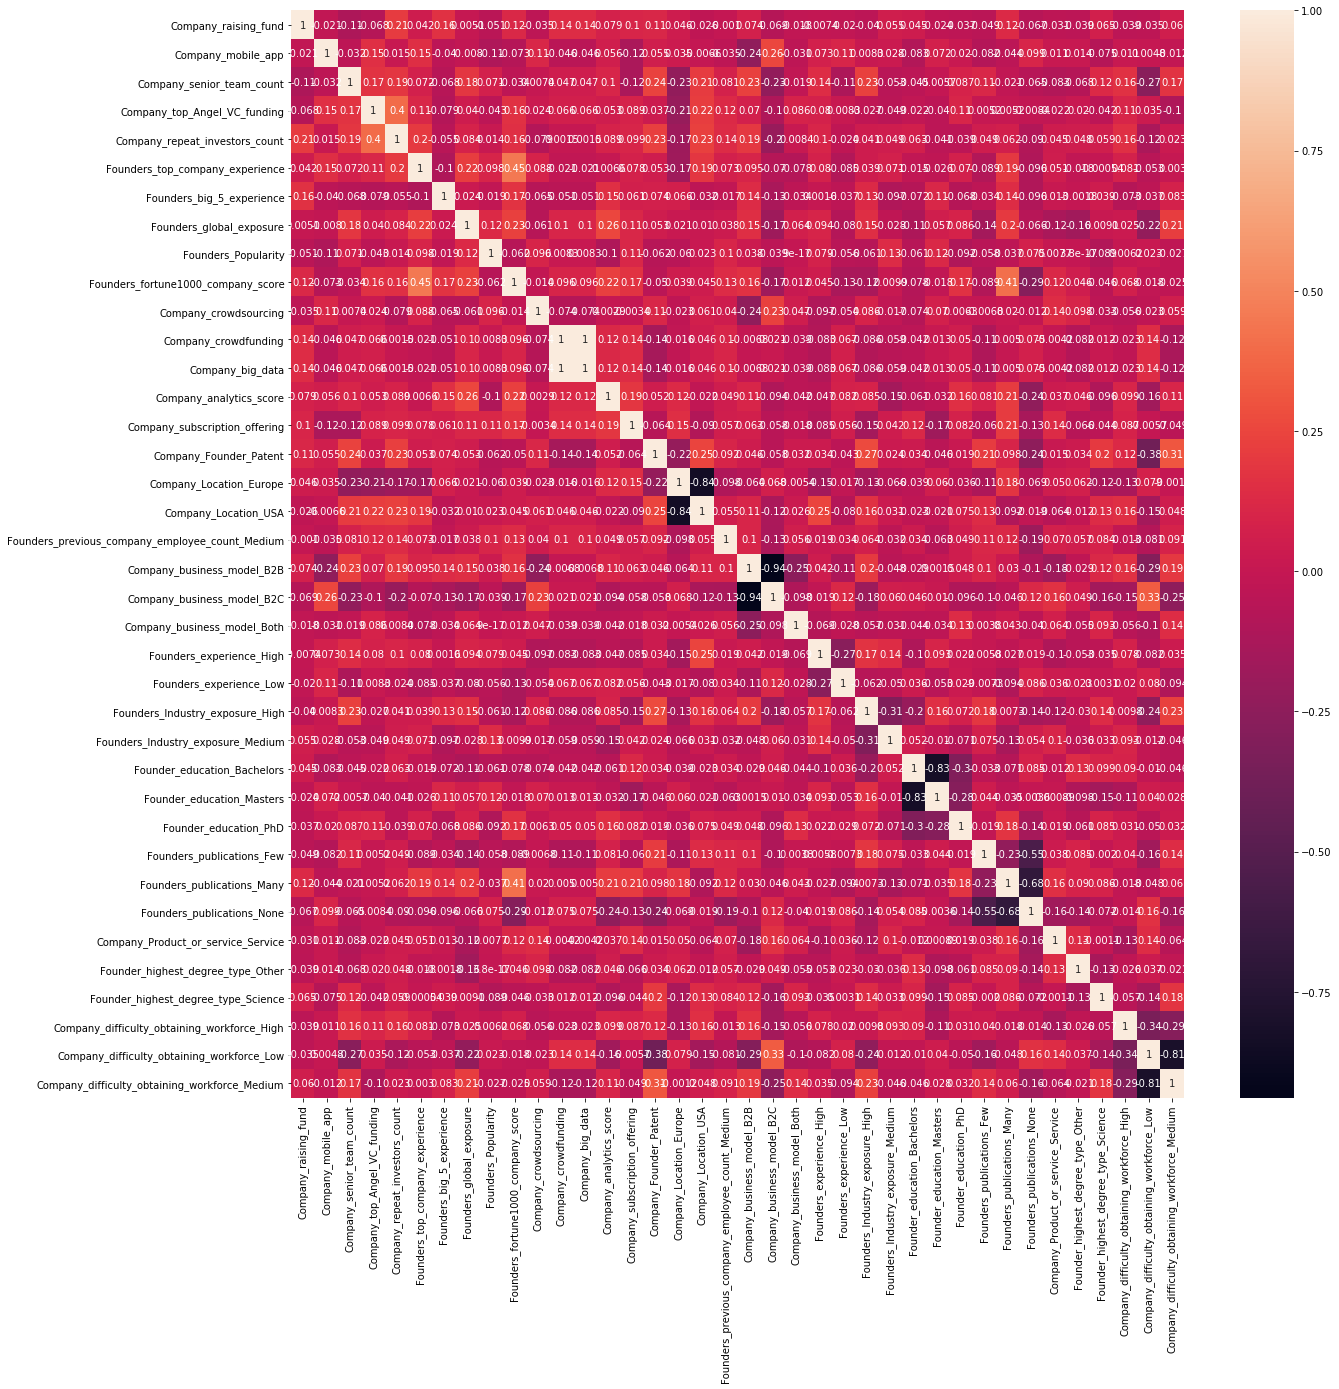

In [33]:
Selected_features= ['Company_raising_fund', 'Company_mobile_app', 'Company_senior_team_count', 'Company_top_Angel_VC_funding', 'Company_repeat_investors_count', 'Founders_top_company_experience', 'Founders_big_5_experience', 'Founders_global_exposure', 'Founders_Popularity', 'Founders_fortune1000_company_score', 'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data', 'Company_analytics_score', 'Company_subscription_offering', 'Company_Founder_Patent', 'Company_Location_Europe', 'Company_Location_USA', 'Founders_previous_company_employee_count_Medium', 'Company_business_model_B2B', 'Company_business_model_B2C', 'Company_business_model_Both', 'Founders_experience_High', 'Founders_experience_Low', 'Founders_Industry_exposure_High', 'Founders_Industry_exposure_Medium', 'Founder_education_Bachelors', 'Founder_education_Masters', 'Founder_education_PhD', 'Founders_publications_Few', 'Founders_publications_Many', 'Founders_publications_None', 'Company_Product_or_service_Service', 'Founder_highest_degree_type_Other', 'Founder_highest_degree_type_Science', 'Company_difficulty_obtaining_workforce_High', 'Company_difficulty_obtaining_workforce_Low', 'Company_difficulty_obtaining_workforce_Medium']
X = final_train[Selected_features]
plt.figure(figsize=(20,20))
sns.heatmap(X.corr(), annot=True, fmt=".2g")

In [34]:
#selecting optimal number of features
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)
print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))


Optimal number of features: 34
Selected features: ['Company_raising_fund', 'Company_mobile_app', 'Company_senior_team_count', 'Company_top_Angel_VC_funding', 'Founders_top_company_experience', 'Founders_big_5_experience', 'Founders_Popularity', 'Founders_fortune1000_company_score', 'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data', 'Company_analytics_score', 'Company_subscription_offering', 'Company_Founder_Patent', 'Company_Location_Europe', 'Company_Location_USA', 'Company_business_model_B2B', 'Company_business_model_B2C', 'Company_business_model_Both', 'Founders_experience_Low', 'Founders_Industry_exposure_High', 'Founders_Industry_exposure_Medium', 'Founder_education_Bachelors', 'Founder_education_Masters', 'Founder_education_PhD', 'Founders_publications_Few', 'Founders_publications_Many', 'Founders_publications_None', 'Company_Product_or_service_Service', 'Founder_highest_degree_type_Other', 'Founder_highest_degree_type_Science', 'Company_difficulty_obtaining_wor

In [35]:
Selectedfeatures = ['Company_raising_fund', 'Company_mobile_app', 'Company_senior_team_count', 'Company_top_Angel_VC_funding', 'Founders_top_company_experience', 'Founders_big_5_experience', 'Founders_Popularity', 'Founders_fortune1000_company_score', 'Company_crowdsourcing', 'Company_crowdfunding', 'Company_big_data', 'Company_analytics_score', 'Company_subscription_offering', 'Company_Founder_Patent', 'Company_Location_Europe', 'Company_Location_USA', 'Company_business_model_B2B', 'Company_business_model_B2C', 'Company_business_model_Both', 'Founders_experience_Low', 'Founders_Industry_exposure_High', 'Founders_Industry_exposure_Medium', 'Founder_education_Bachelors', 'Founder_education_Masters', 'Founder_education_PhD', 'Founders_publications_Few', 'Founders_publications_Many', 'Founders_publications_None', 'Company_Product_or_service_Service', 'Founder_highest_degree_type_Other', 'Founder_highest_degree_type_Science', 'Company_difficulty_obtaining_workforce_High', 'Company_difficulty_obtaining_workforce_Low', 'Company_difficulty_obtaining_workforce_Medium']

### 4.3 Data splitting and modeling

In [36]:
#Splitting the dataset for validation 
X1 = final_train[Selectedfeatures]
y1 = final_train.Success_or_Failure
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [37]:
#Instantiate the model and predciting calculating 
model = LogisticRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
roc = roc_auc_score(y_test,y_pred)
print(roc)

0.7189984101748809


In [38]:
#calculating the evaluation metrics
cf = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test,y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f_score = f1_score(y_test,y_pred)
print(cf)
print(acc)
print(precision)
print(recall)
print(f_score)

[[25  9]
 [11 26]]
0.7183098591549296
0.7428571428571429
0.7027027027027027
0.7222222222222223


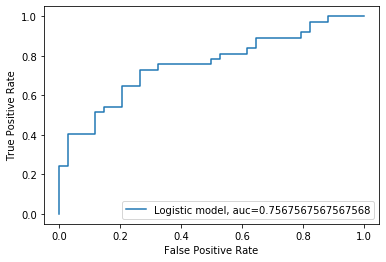


Classification_report:
              precision    recall  f1-score   support

           0       0.69      0.74      0.71        34
           1       0.74      0.70      0.72        37

    accuracy                           0.72        71
   macro avg       0.72      0.72      0.72        71
weighted avg       0.72      0.72      0.72        71



In [39]:
#Predicting the probability for the X_test == 1 and plotting the auc curve
y_pred_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="Logistic model, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()
print ('\n'+'Classification_report:' + '\n' + classification_report(y_test,y_pred))

### 5. Predicting on test data set

In [40]:
#predicting on test dataset
final_test['Success_or_Failure'] = model.predict(final_test[Selectedfeatures])
final_test['CompanyID'] = test['CompanyID']
submission = final_test[['CompanyID','Success_or_Failure']]
submission.to_csv("submission.csv", index=False)
submission

,CompanyID,Success_or_Failure
0,1,0
1,4,1
2,7,0
3,10,0
4,12,1
5,21,1
6,29,1
7,30,0
8,33,1
9,36,0
